<a href="https://colab.research.google.com/github/D-DePablos/WEW/blob/master/Stage_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 4 : Image processing

In science, a large part of data comes in the form of images. It is here where image processing plays a big role!

## Downloading and displaying an Image

The first step to working with images in Python is to get an image ready. We will be using a picture of what is known as "coronal loops" as an example image, but any image URL will work in this section.

In [15]:
import urllib.request


url = 'https://scied.ucar.edu/sites/default/files/images/large_image_for_image_content/coronal_loops_trace_6nov1999_720x500.jpg'

urllib.request.urlretrieve(url, "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x7f60eefe5f28>)

Once we have downloaded the image locally (saved as image.jpg), we can have a look at what we have. Check that everything looks fine!

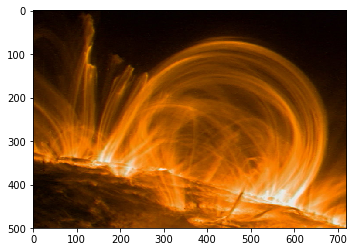

In [60]:
import matplotlib.pyplot as plt

image = plt.imread('image.jpg')

plt.imshow(image)
plt.show()

##The true nature of Images

As you may have expected (perhaps not?), images are no more than arrays of numbers that give information about position, colour and saturation of each of the pixels, for each of Red, Green and Blue.

This is why the image we just plotted has numbered axes!


So this is what the MSSL logo looks like to Python...

In [84]:
import cv2


im = cv2.imread("image.jpg")
print(f' The image is just another array! : {type(im)}')

image_dim = image.shape
print(f'And this is what python sees as the dimensions for the image :{image_dim}')
print(f'\n That is, {image_dim[0]} pixels tall, {image_dim[1]} pixels wide, and in {image_dim[2]} (R,G,B) colours')

 The image is just another array! : <class 'numpy.ndarray'>
And this is what python sees as the dimensions for the image :(500, 720, 3)

 That is, 500 pixels tall, 720 pixels wide, and in 3 (R,G,B) colours


**This is very powerful, as it allows us to use images as if they were numerical arrays!**

We can crop the image, rotate it, or zoom into a part of it with ease!

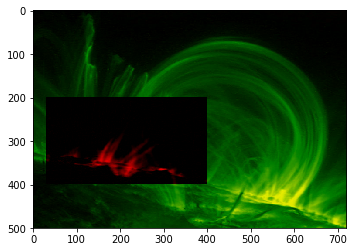

In [85]:
im[:,:,2] = 0  # Set all blue pixels to 0
im[200:400, 30:400, 1] = 0  # Set all Green pixels in a region to 0

plt.imshow(im, origin = 'upper')
plt.show()

So the only remaining pixels in the region 200 < Y < 400 and 30 < X < 400 are red or fully black!

##In this example, we create our own image from an array:

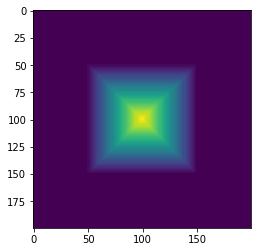

In [57]:
import numpy as np
from scipy import ndimage


# Create an array of zeroes, set some values and blur them out:

im = np.zeros((200, 200))  # Dimensions of 
im[50:-50, 50:-50] = 1 
im = ndimage.distance_transform_bf(im)

# Show our creation
plt.imshow(im)
plt.show()


###And we can now play with the Image:


*   Adding a colorbar and changing the colormap
*   Creating noise 
*   Blurring and sharpening the image

#### Adding a colorbar and changing the colormap

Changing the colormap allows for easier (or harder!) ways to visualize our data. Rainbow colourmaps may look great, but they are not so good at conveying information! (Even with a colorbar on the side).

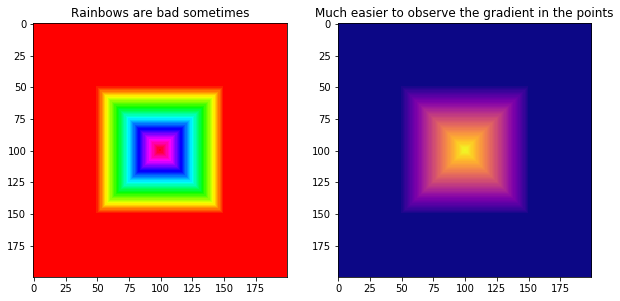

In [51]:
fig = plt.figure(figsize = (10,10))

fig.add_subplot(1,2,1)
plt.imshow(im, cmap = plt.cm.hsv)
plt.title('Rainbows are bad sometimes')

fig.add_subplot(1,2,2)
plt.imshow(im, cmap = plt.cm.plasma)
plt.title('Much easier to observe the gradient in the points')

plt.show()


For a full list of colormaps, do check https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html, where they explain the optimal usage for colormaps!

It is generally agreed upon that perceptually uniform, sequential colormaps are best! i.e plasma, as chosen in the right image.

#### Creating noise

Now that we know to choose a good colourmap, we can make our image seem blurry by randomly modifying values

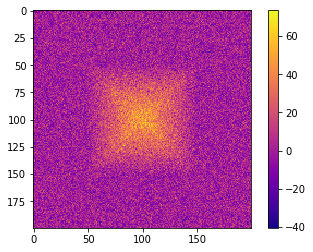

In [55]:
im_noise = im + 10 * np.random.randn(*im.shape) # modifying by 10 times their current value

plt.imshow(im_noise, cmap = plt.cm.plasma)

Which 

#### Blurring and sharpening an image

These two techniques are exact opposites. Let's have a look at an implementation on our simple image.

In [0]:
f = scipy.misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(f, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

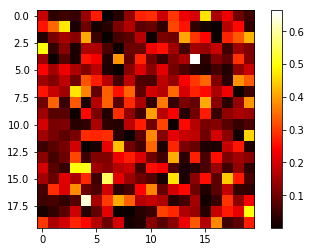

In [14]:
im_med = ndimage.median_filter(im_noise, 3)
plt.imshow(im_med)

plt.imshow(np.abs(im - im_noise), cmap=plt.cm.hot , interpolation='nearest')
plt.colorbar()